In [98]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import sys
sys.path.insert(0,"C:\\Users\\Paolo\\.virtualenvs\\Internship2020-9r0W5TXr\\Lib\\site-packages")
sys.path.insert(1,"C:\\Users\\Paolo\\.virtualenvs\\Internship2020-9r0W5TXr")

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir)
sys.path.insert(3,"C:\\Users\\Paolo\\Google Drive\\Shared_Files\\3-Junior\\3-BW\\Project\\Internship2020\\Indicators")


from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

import statistics

import importlib
import Indicators.IndicatorUtilities as Util
importlib.reload(Util)

countries = CountryMetaDataFile().readMetadata()
dl = DataLib("SignalData")

In [75]:
BondPrices = dl.pull("BondRetIdx/LocalFX")

BondPrices_Monthly = BondPrices.resample('1M').first()

BondReturn_Monthly = Util.AnnualizedChangeTimeSeries(BondPrices_Monthly, 'M', 1)

BondReturn_Future = BondReturn_Monthly.shift(-1)

BondReturn_Future.tail()

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,CHE,GBR,USA
date,,,,,,,,,,
2020-04,-0.165070,0.142840,0.108679,-0.034830,0.125538,-0.248892,0.044245,0.250591,0.066870,-0.061362
2020-05,-0.015839,-0.207319,-0.004319,0.296691,-0.070723,0.385975,-0.037214,-0.085380,0.037638,-0.002324
2020-06,-0.019436,0.043356,0.016826,0.092601,0.101819,0.318647,-0.045465,-0.080896,0.025622,-0.003378
2020-07,0.070750,0.144722,0.073404,0.216781,0.166943,0.337516,0.040220,0.166970,0.106688,0.167026
2020-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


country    AUS     DEU  CAN  ESP  FRA  ITA    JPN  CHE  GBR    USA
date                                                              
1980-01   9.97     NaN  NaN  NaN  NaN  NaN  7.295  NaN  NaN  11.23
1980-02  10.38   8.426  NaN  NaN  NaN  NaN  7.295  NaN  NaN  12.04
1980-03  10.75   9.123  NaN  NaN  NaN  NaN  7.295  NaN  NaN  14.83
1980-04  11.20  10.085  NaN  NaN  NaN  NaN  7.960  NaN  NaN  14.59
1980-05  11.40   9.416  NaN  NaN  NaN  NaN  7.960  NaN  NaN  10.70


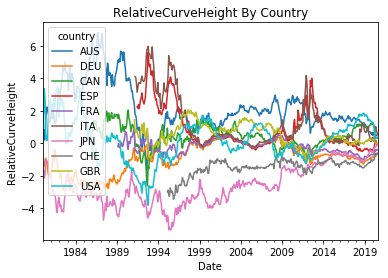

          Height    Return
Height  1.000000  0.088817
Return  0.088817  1.000000


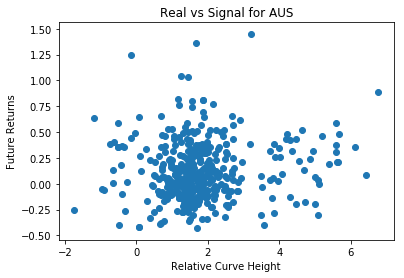

          Height    Return
Height  1.000000  0.005549
Return  0.005549  1.000000


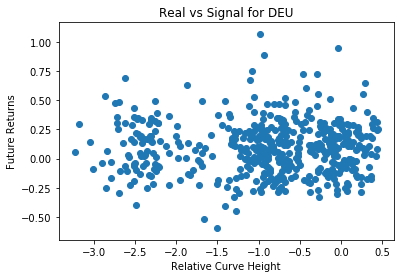

          Height    Return
Height  1.000000  0.075985
Return  0.075985  1.000000


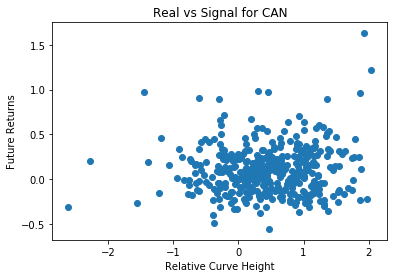

          Height    Return
Height  1.000000  0.254646
Return  0.254646  1.000000


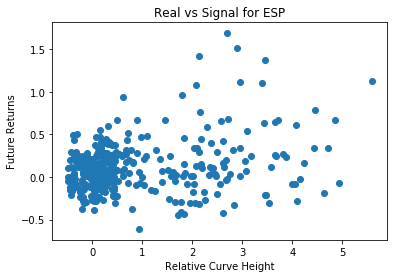

          Height    Return
Height  1.000000  0.116721
Return  0.116721  1.000000


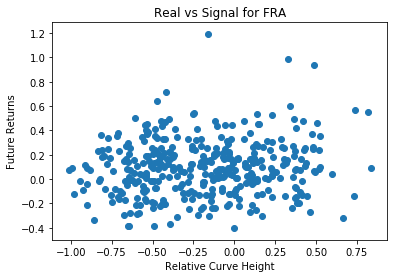

          Height    Return
Height  1.000000  0.263905
Return  0.263905  1.000000


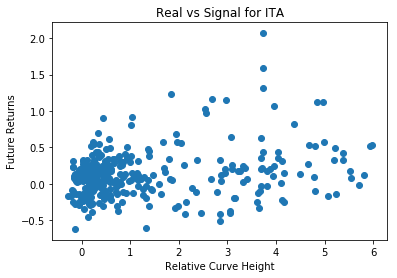

          Height    Return
Height  1.000000 -0.119343
Return -0.119343  1.000000


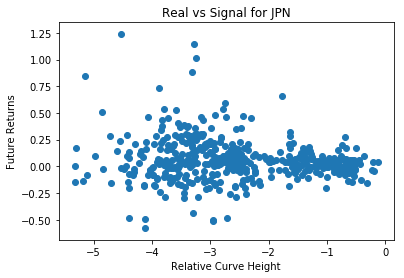

          Height    Return
Height  1.000000 -0.086177
Return -0.086177  1.000000


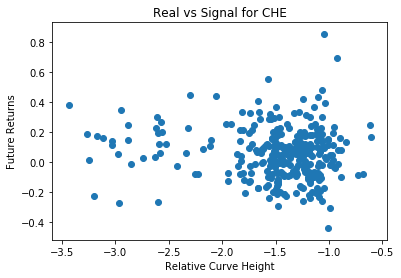

          Height    Return
Height  1.000000  0.074884
Return  0.074884  1.000000


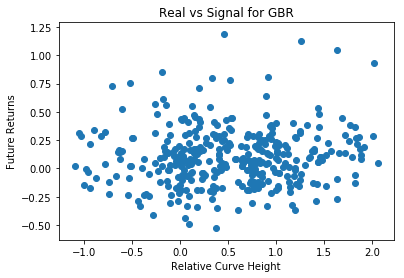

          Height    Return
Height  1.000000  0.074907
Return  0.074907  1.000000


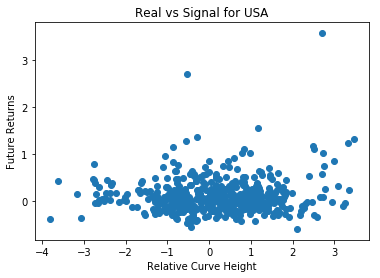

In [76]:
LongRates = dl.pull("LongRates")
ShortRates = dl.pull("ShortRates")

print(ShortRates.head())

# Generate Curve Height as average of the two
CurveHeight = (LongRates + ShortRates) / 2

# Generate Relative Curve height as difference compared to the mean of all countries in that time period
RelativeCurveHeight = CurveHeight.sub(CurveHeight.mean(axis=1), axis=0)

# CurveHeight.head()
RelativeCurveHeight.head()

RelativeCurveHeight.plot()
plt.xlabel('Date')
plt.ylabel('RelativeCurveHeight')
plt.title('RelativeCurveHeight By Country')
plt.show(block = False)

# TODO: do something to normalize by inflation expectations, currency hedging, because real returns matter?

all_countries = RelativeCurveHeight.columns

for country in all_countries:
    temp = pd.DataFrame()
    
    temp['Height'] = RelativeCurveHeight[country]   
    temp['Return'] = BondReturn_Future[country]
    
    print(temp.corr())
    
    
    
    plt.scatter(temp['Height'], temp['Return'])
    plt.title("Real vs Signal for " + country)
    plt.xlabel('Relative Curve Height')
    plt.ylabel('Future Returns')
    plt.show()


country    AUS    DEU    CAN    ESP    FRA    ITA    JPN    CHE    GBR    USA
date                                                                         
2019-11  0.273  0.281 -0.108  0.724  0.553  1.168  0.088  0.170  0.141  0.166
2019-12  0.367  0.338 -0.076  0.893  0.632  1.355  0.118  0.191  0.188  0.222
2020-01  0.441  0.407  0.005  0.872  0.731  1.447  0.105  0.257  0.289  0.349
2020-02  0.291  0.238 -0.163  0.718  0.455  1.149  0.098 -0.030  0.040  0.167
2020-03  0.310  0.207 -0.048  0.749  0.441  1.164  0.121 -0.012  0.142  0.262
2020-04  0.472  0.183  0.220  0.845  0.528  1.135  0.141  0.235  0.197  0.401
2020-05  0.668  0.173  0.195  0.838  0.501  1.252  0.132  0.108  0.213  0.438
2020-06  0.619  0.260  0.250  0.988  0.486  1.126  0.170  0.214  0.233  0.504
2020-07  0.660  0.260  0.241  1.000  0.534  1.236  0.186  0.255  0.274  0.518
2020-08  0.583  0.177  0.205  0.713  0.415  1.097  0.158  0.260  0.174  0.448
          Premium    Return
Premium  1.000000  0.016953
Return  

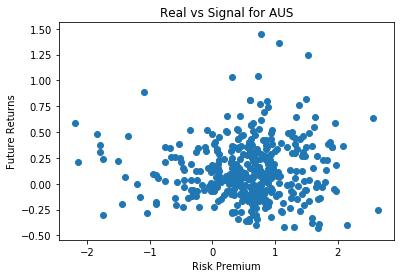

          Premium    Return
Premium  1.000000 -0.015883
Return  -0.015883  1.000000


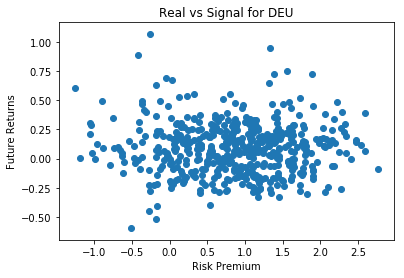

          Premium    Return
Premium  1.000000 -0.005639
Return  -0.005639  1.000000


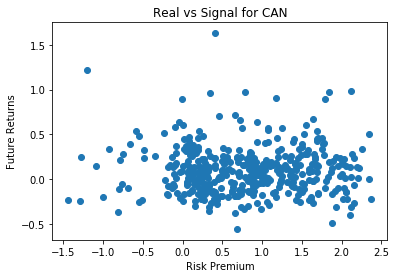

          Premium    Return
Premium  1.000000 -0.003437
Return  -0.003437  1.000000


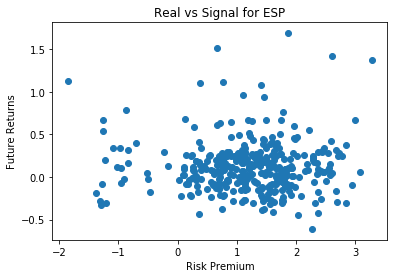

          Premium    Return
Premium  1.000000  0.024262
Return   0.024262  1.000000


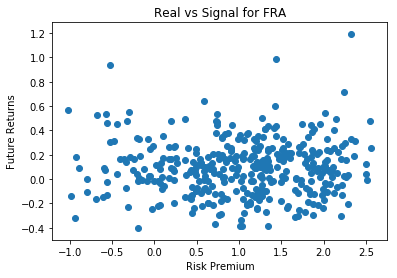

          Premium    Return
Premium  1.000000  0.009966
Return   0.009966  1.000000


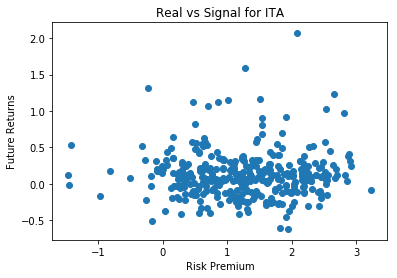

          Premium    Return
Premium  1.000000  0.104032
Return   0.104032  1.000000


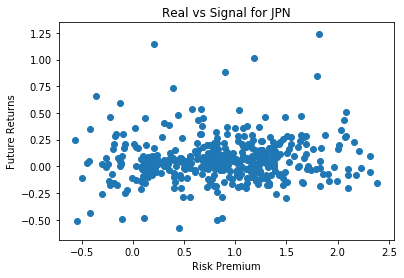

          Premium    Return
Premium  1.000000  0.131433
Return   0.131433  1.000000


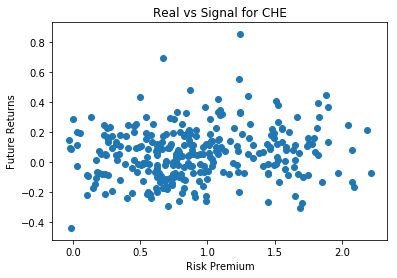

          Premium    Return
Premium  1.000000  0.032074
Return   0.032074  1.000000


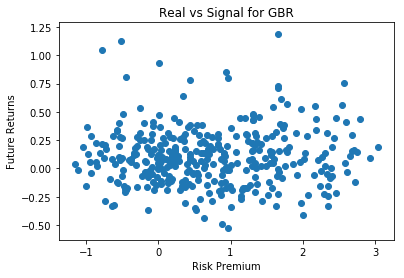

          Premium    Return
Premium  1.000000 -0.064823
Return  -0.064823  1.000000


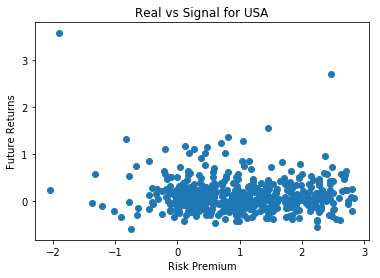

In [99]:
# Generate Risk Premium 
RiskPremium = LongRates - ShortRates
print(RiskPremium.tail(10))

# Test how well it predicts
for country in all_countries:
    temp = pd.DataFrame()
    
    temp['Premium'] = RiskPremium[country]   
    temp['Return'] = BondReturn_Future[country]
    
    print(temp.corr())
    
    plt.scatter(temp['Premium'], temp['Return'])
    plt.title("Real vs Signal for " + country)
    plt.xlabel('Risk Premium')
    plt.ylabel('Future Returns')
    plt.show()

RiskPremium_Normalized = Util.NormalizeDF(RiskPremium, 120, center = 0)

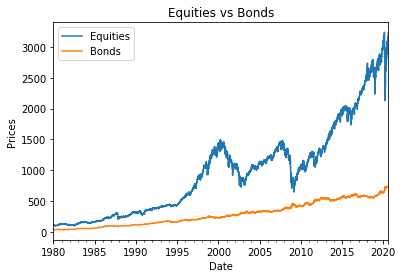

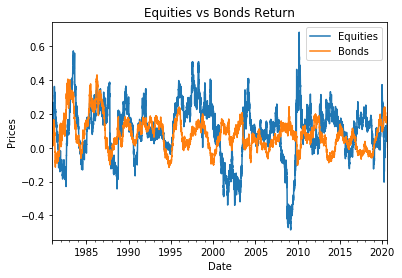

date
2008-07-01    1227.002
2008-07-02    1203.564
2008-07-03    1203.398
2008-07-04    1203.398
2008-07-07    1193.261
2008-07-08    1213.295
2008-07-09    1186.559
2008-07-10    1195.306
2008-07-11    1182.623
2008-07-14    1172.797
2008-07-15    1159.810
2008-07-16    1187.508
2008-07-17    1201.015
2008-07-18    1200.968
2008-07-21    1201.967
2008-07-22    1216.694
2008-07-23    1220.812
2008-07-24    1192.387
2008-07-25    1197.666
2008-07-28    1176.227
2008-07-29    1202.875
2008-07-30    1223.441
2008-07-31    1207.120
2008-08-01    1200.425
2008-08-04    1188.126
2008-08-05    1220.884
2008-08-06    1225.983
2008-08-07    1204.715
2008-08-08    1232.099
2008-08-11    1240.516
                ...   
2008-11-21     753.685
2008-11-24     802.633
2008-11-25     808.355
2008-11-26     837.624
2008-11-27     837.624
2008-11-28     845.760
2008-12-01     769.856
2008-12-02     800.385
2008-12-03     821.172
2008-12-04     796.495
2008-12-05     825.785
2008-12-08     857.470
2008-1

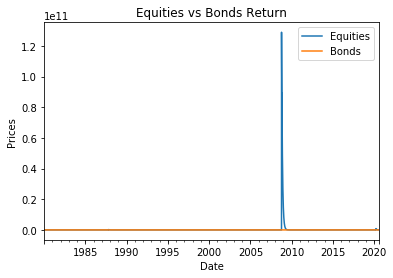

In [78]:
# Generate relative stock-bond performance
EquityPrices = dl.pull("EquityPrices")
BondPrices = dl.pull("BondRetIdx/LocalFX")


for country in ["USA"]:
    EquityPrices[country].plot(label="Equities")
    BondPrices[country].plot(label="Bonds")
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()
    plt.title('Equities vs Bonds')
    plt.show(block = False)
    
EquityPrice_PctChange = Util.AnnualizedChangeTimeSeries(EquityPrices, 'D', 261)
BondPrices_PctChange = Util.AnnualizedChangeTimeSeries(BondPrices, 'D', 261)

for country in ["USA"]:
    EquityPrice_PctChange[country].plot(label="Equities")
    BondPrices_PctChange[country].plot(label="Bonds")
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()
    plt.title('Equities vs Bonds Return')
    plt.show(block = False)

EquityPrice_PctChange_Daily = Util.AnnualizedChangeTimeSeries(EquityPrices, 'D', 1)
BondPrice_PctChange_Daily = Util.AnnualizedChangeTimeSeries(BondPrices, 'D', 1)

print(EquityPrices['USA']['2008-07-01':'2009-01-01'])

    
EquityPrice_PctChange_EW = EquityPrice_PctChange_Daily.ewm(span = 50).mean()
BondPrice_PctChange_EW = BondPrice_PctChange_Daily.ewm(span = 50).mean()

# TODO: Risk adjusted returns

for country in ["USA"]:
    EquityPrice_PctChange_EW[country].plot(label="Equities")
    BondPrice_PctChange_EW[country].plot(label="Bonds")
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()
    plt.title('Equities vs Bonds Return')
    plt.show(block = False)

In [79]:
UNITS_IN_YEAR = {'D': 261, 'M': 12, 'Y': 1, 'Q': 4}
assert datafreq in UNITS_IN_YEAR
Annual_Units = UNITS_IN_YEAR[datafreq]

assert type(period) == int
series_ChangeUnannualized = series.pct_change(period, fill_method = None).dropna(how='all')
series_ChangeUnannualized['period'] = series_ChangeUnannualized['date'] - series_ChangeUnannualized['date'].shift(1)

series_ChangeAnnualized = (series_ChangeUnannualized + 1)**(Annual_Units/series_ChangeUnannualized['period']) - 1

return series_ChangeAnnualized

NameError: name 'datafreq' is not defined

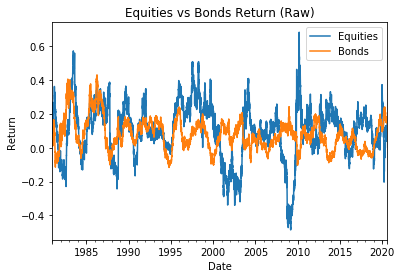

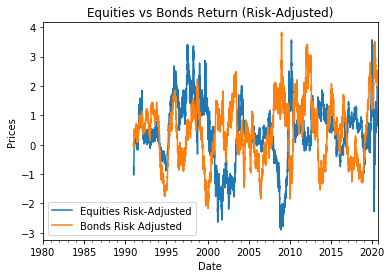

In [106]:
EquityPrices = dl.pull("EquityPrices")
BondPrices = dl.pull("BondRetIdx/LocalFX")
ShortRates = dl.pull("ShortRates")

EquityPrices_PctChange = Util.AnnualizedChangeTimeSeries(EquityPrices, 'D', 261)
BondPrices_PctChange = Util.AnnualizedChangeTimeSeries(BondPrices, 'D', 261)

for country in ["USA"]:
    EquityPrices_PctChange[country].plot(label="Equities")
    BondPrices_PctChange[country].plot(label="Bonds")
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend()
    plt.title('Equities vs Bonds Return (Raw)')
    plt.show(block = False)

ShortRatesDaily = ShortRates.resample('1B').ffill() / 100
    
EquityPrices_PctChangeSharpe = (EquityPrices_PctChange - ShortRatesDaily) / EquityPrices_PctChange.rolling(261*10).std()
BondPrices_PctChangeSharpe = (BondPrices_PctChange - ShortRatesDaily) / BondPrices_PctChange.rolling(261*10).std()


for country in ["USA"]:
    EquityPrices_PctChangeSharpe[country].plot(label="Equities Risk-Adjusted")
    BondPrices_PctChangeSharpe[country].plot(label="Bonds Risk Adjusted")
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.legend()
    plt.title('Equities vs Bonds Return (Risk-Adjusted)')
    plt.show()

EquityBondRelative = (EquityPrices_PctChangeSharpe - BondPrices_PctChangeSharpe) / 100
EquityBondRelative_Normalized = Util.NormalizeDF(EquityBondRelative, 2610, center = 0)
EquityBondRelativeMontly_Normalized = EquityBondRelative_Normalized.resample('1M').first()
    

country       AUS       DEU       CAN       ESP       FRA       ITA       JPN  \
date                                                                            
2020-04 -0.032089 -0.003665 -0.006260 -0.003664 -0.003676 -0.003665 -0.004286   
2020-05 -0.055950 -0.031327 -0.030064 -0.031342 -0.031328 -0.031342  0.003153   
2020-06 -0.019387 -0.018184 -0.003764 -0.018214 -0.018221 -0.018215 -0.008079   
2020-07  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-08       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

country       CHE       GBR       USA  
date                                   
2020-04 -0.000309 -0.008864  0.015822  
2020-05 -0.020192  0.018374  0.011704  
2020-06 -0.017348  0.013173  0.035419  
2020-07  0.000000  0.000000  0.000000  
2020-08       NaN       NaN       NaN  
country       AUS       DEU       CAN       ESP       FRA       ITA       JPN  \
date                                                                   

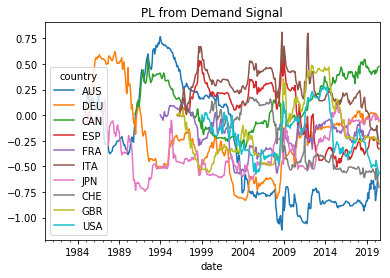

In [110]:

# DemandSignal = -EquityBondRelativeMontly_Normalized

RelativeCurveHeight_Normalized = Util.NormalizeDF(RelativeCurveHeight, 60)


DemandSignal = - EquityBondRelativeMontly_Normalized


BondPrices = dl.pull("BondRetIdx/LocalFX")

FXvsUSD = dl.pull('fxVsUSD')

BondReturn_Daily = BondPrices.pct_change(1).shift(-1)
BondReturn_Monthly = BondReturn_Daily.resample('1M').sum()
fxVsUSD_Monthly = FXvsUSD.pct_change(1).shift(-1)
print(fxVsUSD_Monthly.tail())
print(BondReturn_Monthly.tail())

NetReturn = BondReturn_Monthly - fxVsUSD_Monthly

PL_Raw = NetReturn * DemandSignal
PL_Total = PL_Raw.cumsum()

PL_Total.plot()
plt.title("PL from Demand Signal")
plt.show()